In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

In [190]:
def box_hamiltonian(highest_level, hbar, mass, length):
    constant_factor = np.pi ** 2 * hbar ** 2 / (2 * mass * length ** 2)
    matrix = np.zeros((highest_level, highest_level))
    for n in range(1, highest_level + 1):
        matrix[n - 1, n - 1] = n ** 2
    return np.matrix(constant_factor * matrix)

def partition_function(beta, hamiltonian):
    return np.trace(expm(-beta * hamiltonian))

def box_thermal_state(highest_level ,hbar, mass, length, beta):
    H = box_hamiltonian(highest_level, hbar, mass, length)
    return np.matrix(expm(- beta * H) / partition_function(beta, H))

def time_evolution(hamiltonian, time, hbar):
    return np.matrix(expm(-1j * hamiltonian * time / hbar))

def box_position_operator(highest_level, hbar, mass, length, time):
    matrix = np.zeros((highest_level, highest_level), dtype=np.complex128)
    for n in range(1, highest_level + 1):
        En = n ** 2 * hbar ** 2 * n ** 2/ (2 * mass * length ** 2)
        for m in range(1, highest_level + 1):
            Em = m ** 2 * hbar ** 2 * m ** 2/ (2 * mass * length ** 2)
            phase = np.e ** (-1j * (Em - En) * time / hbar)
            if m == n:
                amplitude = length / 2
            else:
                amplitude = 2 * length * (-2 * m * n + 2 * (-1) ** (m + n) * m * n) / ((m ** 2 - n **2) ** 2 * np.pi ** 2)
            matrix[n - 1, m - 1] = phase * amplitude
    return np.matrix(matrix)

def box_momentum_operator(highest_level, hbar, length):
    matrix = np.zeros((highest_level, highest_level), dtype=np.complex128)
    for n in range(1, highest_level + 1):
        kn = n * np.pi / length
        matrix[n - 1, n - 1] = hbar * kn
    return np.matrix(matrix)

def energy_expectation(highest_level, hbar, mass, length, beta):
    H = box_hamiltonian(highest_level, hbar, mass, length)
    rho = box_thermal_state(highest_level, hbar, mass, length, beta)
    return np.trace(H * rho)

In [193]:
def box_OTOC_beta(highest_level, hbar, mass, length, beta, time):
    rho = box_thermal_state(highest_level, hbar, mass, length, beta)
    x = box_position_operator(highest_level, hbar, mass, length, time)
    p = box_momentum_operator(highest_level, hbar, length)
    commutator = x * p - p * x
    otoc_operator = commutator ** 2
    expectation = np.trace(rho * otoc_operator)
    return - expectation

def box_OTOC_temp(highest_level, hbar, mass, length, boltzmann, temp, time):
    beta = 1 / (boltzmann * temp)
    rho = box_thermal_state(highest_level, hbar, mass, length, beta)
    x = box_position_operator(highest_level, hbar, mass, length, time)
    p = box_momentum_operator(highest_level, hbar, length)
    commutator = x * p - p * x
    otoc_operator = commutator ** 2
    values = otoc_operator * rho
    print()
    print('NEW MATRICES')
    print('position:')
    print(x)
    print('momentum:')
    print(p)
    print('commutation components:')
    print(x * p)
    print('---')
    print(p * x)
    print('---')
    print(commutator)
    expectation = np.trace(values)
    return - expectation

def box_OTOC_temp_over_time(highest_level, hbar, mass, length, boltzmann, temp, min_time, max_time):
    delta_t = 1 / 100
    t = np.linspace(min_time, max_time, np.int(np.round((max_time - min_time) / delta_t)))
    c = np.zeros(t.shape)
    for i in range(len(c)):
        c[i] = box_OTOC_temp(highest_level, hbar, mass, length, boltzmann, temp, delta_t * i + min_time)
    return t, c

In [162]:
H = box_hamiltonian(3, 1, 1, 1)

In [158]:
Z = partition_function(1, H)

In [160]:
H / Z

matrix([[ 686.16245853,    0.        ,    0.        ],
        [   0.        , 2744.6498341 ,    0.        ],
        [   0.        ,    0.        , 6175.46212673]])

In [165]:
box_thermal_state(2, 1, 1, 1, 0.0001)

matrix([[0.50037011, 0.        ],
        [0.        , 0.49962989]])

In [169]:
np.trace(box_thermal_state(2134, 1, 1, 1, 0.0001))

1.0

In [153]:
energy_expectation(1, 1, 1, 1, 0.1)

39.889191693778486

In [62]:
time_evolution(H, 19, 1)

matrix([[0.98870462-0.14987721j, 0.        +0.j        ,
         0.        +0.j        ],
        [0.        +0.j        , 0.82433133-0.56610764j,
         0.        +0.j        ],
        [0.        +0.j        , 0.        +0.j        ,
         0.21510527-0.97659087j]])

In [121]:
box_position_operator(3, 1, 1, 1, 0)

matrix([[ 0.5       +0.j, -0.18012655+0.j,  0.        +0.j],
        [-0.18012655+0.j,  0.5       +0.j, -0.19453667+0.j],
        [ 0.        +0.j, -0.19453667+0.j,  0.5       +0.j]])

In [81]:
box_momentum_operator(3, 1, 1)

matrix([[3.14159265+0.j, 0.        +0.j, 0.        +0.j],
        [0.        +0.j, 6.28318531+0.j, 0.        +0.j],
        [0.        +0.j, 0.        +0.j, 9.42477796+0.j]])

In [106]:
box_OTOC_temp(3, 1, 1, 1, 1, 0.01, 2)

(6.592056283749418e+215-0j)

In [202]:
t, c = box_OTOC_temp_over_time(4, 1, 1, 1, 1, 1, 0, 0.01)


NEW MATRICES
position:
[[ 0.5       +0.j -0.18012655+0.j  0.        +0.j -0.01441012+0.j]
 [-0.18012655+0.j  0.5       +0.j -0.19453667+0.j  0.        +0.j]
 [ 0.        +0.j -0.19453667+0.j  0.5       +0.j -0.19850681+0.j]
 [-0.01441012+0.j  0.        +0.j -0.19850681+0.j  0.5       +0.j]]
momentum:
[[ 3.14159265+0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  6.28318531+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  9.42477796+0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j 12.56637061+0.j]]
commutation components:
[[ 1.57079633+0.j -1.13176848+0.j  0.        +0.j -0.18108296+0.j]
 [-0.56588424+0.j  3.14159265+0.j -1.83346494+0.j  0.        +0.j]
 [ 0.        +0.j -1.22230996+0.j  4.71238898+0.j -2.49451013+0.j]
 [-0.04527074+0.j  0.        +0.j -1.8708826 +0.j  6.28318531+0.j]]
---
[[ 1.57079633+0.j -0.56588424+0.j  0.        +0.j -0.04527074+0.j]
 [-1.13176848+0.j  3.14159265+0.j -1.22230996+0.j  0.        +0.

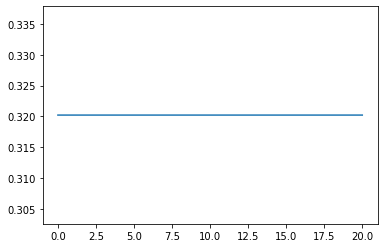

In [188]:
plt.plot(t, c)

In [141]:
c

array([2.98498967e+217, 2.98498967e+217, 2.98498967e+217, ...,
       2.98498967e+217, 2.98498967e+217, 2.98498967e+217])